In [12]:
import graph_tool.all as gt 

g=gt.collection.data['lesmis'].copy()

In [37]:
# read graph txt

f = open('g.txt','r')
lines=[[n for n in x.split()] for x in f.readlines()]
f.close()
lines
g = gt.Graph()
lines_=[]
for _ in lines:
    l=[]
    l.append(int(_[0]))
    l.append(int(_[1]))
    l.append(float(_[2]))
    lines_.append(l)
print(lines_)
g.add_vertex(1 + max([l[0] for l in lines_] + [l[1] for l in lines_]))
property_map=g.new_edge_property('float')
for l in lines_:
    g.add_edge(g.vertex(l[0]),g.vertex(l[1]))
    property_map[g.edge(g.vertex(l[0]),g.vertex(l[1]))]=l[2]

[[0, 1, 0.3], [0, 2, 0.4], [1, 3, 0.5], [0, 3, 0.6]]


In [79]:
for e in g.edges():
    print(e)
print(list(property_map))

(0, 1)
(0, 2)
(0, 3)
(1, 3)
[0.3, 0.4, 0.6, 0.5]


In [69]:
#g = gt.collection.data["lesmis"].copy()

import random as rd 

#q = g.new_ep("double", .98)   # edge uncertainties
N = g.num_vertices()
E = g.num_edges()
#e = g.edge(11, 36)
#q[e] = .5                     # ambiguous true edge
q=property_map
#e = g.add_edge(15, 73)
#q[e] = .5                     # ambiguous spurious edge

# We inititialize UncertainBlockState, assuming that each non-edge
# has an uncertainty of q_default, chosen to preserve the expected
# density of the original network:

q_default = (E - sum(q)) / ((N * (N - 1))/2 - E)

state = gt.UncertainBlockState(g, q=q, q_default=q_default)
print('done state')
# We will first equilibrate the Markov chain
gt.mcmc_equilibrate(state, wait=100, mcmc_args=dict(niter=10))
print('100')
# Now we collect the marginals for exactly 100,000 sweeps, at
# intervals of 10 sweeps:

u = None              # marginal posterior edge probabilities
bs = []               # partitions
cs = []               # average local clustering coefficient

def collect_marginals(s):
   global bs, u, cs
   print('before',s==state)
   u = s.collect_marginal(u)
   bstate = s.get_block_state()
   bs.append(bstate.levels[0].b.a.copy())
   cs.append(gt.local_clustering(s.get_graph()).fa.mean())
   print('u',u)
   print('bs',bs)
print('1000')
gt.mcmc_equilibrate(state, force_niter=1000, mcmc_args=dict(niter=10),
                    callback=collect_marginals)

eprob = u.ep.eprob


/Users/xinsh758/opt/anaconda3/envs/gt/lib/python3.13/site-packages/graph_tool/inference/uncertain_blockmodel.py:451: RuntimeWarning: invalid value encountered in log1p
  np.log1p(-q_default) * (self.M - self.g.num_edges())


done state
100
1000
before True
u <Graph object, directed, with 4 vertices and 0 edges, 2 internal edge properties, 1 internal graph property, at 0x1c5f0b240>
bs [PropertyArray([2, 2, 2, 2], dtype=int32)]
before True
u <Graph object, directed, with 4 vertices and 0 edges, 2 internal edge properties, 1 internal graph property, at 0x1c5f0b240>
bs [PropertyArray([2, 2, 2, 2], dtype=int32), PropertyArray([5, 5, 5, 5], dtype=int32)]
before True
u <Graph object, directed, with 4 vertices and 0 edges, 2 internal edge properties, 1 internal graph property, at 0x1c5f0b240>
bs [PropertyArray([2, 2, 2, 2], dtype=int32), PropertyArray([5, 5, 5, 5], dtype=int32), PropertyArray([5, 5, 5, 5], dtype=int32)]
before True
u <Graph object, directed, with 4 vertices and 0 edges, 2 internal edge properties, 1 internal graph property, at 0x1c5f0b240>
bs [PropertyArray([2, 2, 2, 2], dtype=int32), PropertyArray([5, 5, 5, 5], dtype=int32), PropertyArray([5, 5, 5, 5], dtype=int32), PropertyArray([5, 5, 5, 5], dt

KeyboardInterrupt: 

In [2]:
import load_graph
import importlib
importlib.reload(load_graph)
import load_graph
import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
filename='g.txt'
g,property_map=load_graph.read_graph_tool_g(filename)
clustering=br.clustering(g,property_map)


ModuleNotFoundError: No module named 'graph_tool'

RUN EXPERIMENTS

In [ ]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
path='mcp_acp_data//k10_l10//'
filelist=[i for i in os.listdir(path) if (i[-3:]=='txt' and i[10]=='1' and i[11]=='0' and i[12]=='_' )]
filelist.sort()
print(filelist)

# run weighted louvain, save clustering
k=10
l=10
value=[]
T=[]
clustering=[]
rep=5
#path='datasets//'
for graph in filelist:
    Emod=0
    current_cluster=[]
    for _ in range(rep):
        g,property_map=load_graph.read_graph_tool_g(path+graph)
        

        edge=[]
        p=list(property_map.a)
        
            
        for e in g.edges():
            
            edge.append((int(e.source()),int(e.target())))
            

        t1=time.time()
        cluster=br.clustering(g,property_map)
        t2=time.time()
        current_cluster.append(cluster)
        #clustering.append(cluster)
        Emod+=ex.APWP(edge,p,Trans_C1(cluster))
    clustering.append(current_cluster)
    print('----------graph: ',graph,'----------')
    print('cluster:',cluster)
    print('-----------Ex modularity',Emod,'-----------')
    value.append(Emod/rep)
    T.append(t2-t1)




# run ex mod, save time and value



['evolving_k10_l10_p0.00.txt', 'evolving_k10_l10_p0.05.txt', 'evolving_k10_l10_p0.1.txt', 'evolving_k10_l10_p0.15.txt', 'evolving_k10_l10_p0.2.txt', 'evolving_k10_l10_p0.25.txt', 'evolving_k10_l10_p0.3.txt', 'evolving_k10_l10_p0.35.txt', 'evolving_k10_l10_p0.4.txt', 'evolving_k10_l10_p0.45.txt', 'evolving_k10_l10_p0.5.txt', 'evolving_k10_l10_p0.55.txt', 'evolving_k10_l10_p0.6.txt', 'evolving_k10_l10_p0.65.txt', 'evolving_k10_l10_p0.7.txt', 'evolving_k10_l10_p0.75.txt', 'evolving_k10_l10_p0.8.txt', 'evolving_k10_l10_p0.85.txt', 'evolving_k10_l10_p0.9.txt', 'evolving_k10_l10_p0.95.txt', 'evolving_k10_l10_p1.txt']
mcmc running..
mcmc running..
mcmc running..
mcmc running..
mcmc running..
----------graph:  evolving_k10_l10_p0.00.txt ----------
cluster: [30 30 30 30 30 30 30 30 30 30 41 41 41 41 41 41 41 41 41 41 58 58 58 58
 58 58 58 58 58 58 61 61 61 61 61 61 61 61 61 61 46 46 46 46 46 46 46 46
 46 46  6  6  6  6  6  6  6  6  6  6 66 66 66 66 66 66 66 66 66 66  0  0
  0  0  0  0  0  0  0 

In [8]:
print(value)

[0.8237564945399003, 0.7488956912287213, 0.6581198452165844, 0.5936375595191643, 0.5242628541997177, 0.30851549349922813, 0.14078687040450472, 0.11281403022013625, 0.06932041807090858, 0.07872481207185325, 0.0857166688515904, 0.055115155008512176, 0.03878816958215175, -0.001000552382631116, 0.026552358838286612, 0.0008480029416326279, -0.002484329917322732, -0.044128966264648115, -0.010060702040338997, -0.024710298662461598, 0.0622144878159693]


[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1] 21
[0.7589285148503979, 0.8456432728373148, 0.7973048131631006, 0.6122865759444577, 0.48560769839269846, 0.1154927449114475, 0.31098842304781354, 0.09007346346766441, 0.023137630358478534, 0.02899703715258192, 0.14437746457422576, -0.001019579580883452, 0.019387070597614808, 0.043486821606865275, 0.03287900869779273, -0.037095945860540706, 0.0, -0.018871047967810486, 0.015876423714379674, -0.018242533771666722, 0.023446685573343812] 21


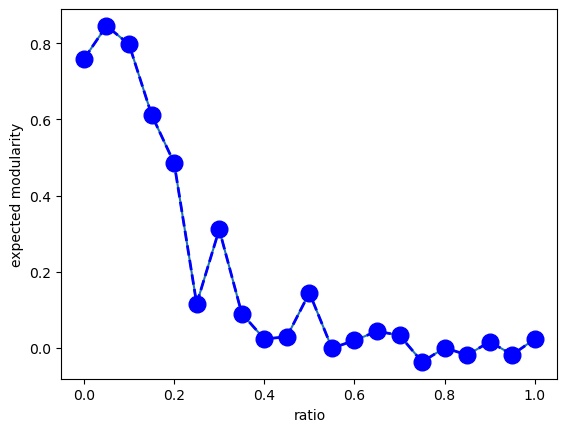

In [37]:
import matplotlib.pyplot as plt
list_=[1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0]
list_.reverse()
print(list_,len(list_))
print(value,len(value))
#list_.reverse()
plt.plot(list_,value)
plt.plot(list_, value, color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.xlabel('ratio')
plt.ylabel('expected modularity')
plt.savefig('fig//ex_mod_ratio_bayes.pdf')

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1] 21
[180.40429520606995, 169.5897617340088, 170.1384198665619, 180.8935101032257, 199.44989800453186, 191.80660915374756, 182.19788312911987, 189.07558512687683, 186.78397607803345, 185.60007667541504, 188.76110696792603, 186.9770848751068, 181.7710201740265, 188.1336488723755, 184.79699683189392, 188.90869688987732, 190.8125078678131, 191.99218583106995, 187.7792911529541, 188.45085406303406, 186.4903540611267] 21


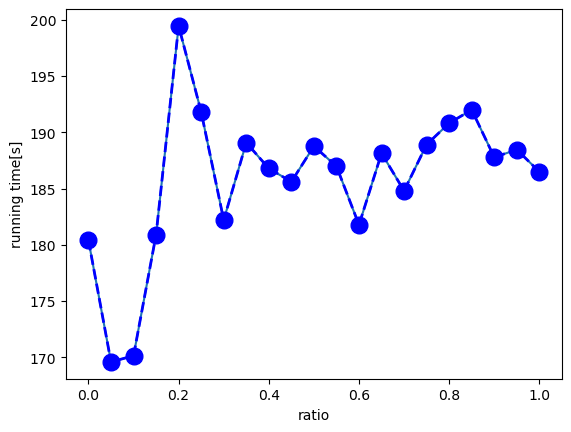

In [39]:
import matplotlib.pyplot as plt
list_=[1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0]
list_.reverse()
print(list_,len(list_))
print(T,len(T))
#list_.reverse()
plt.plot(list_,T)
plt.plot(list_, T, color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)

plt.xlabel('ratio')
plt.ylabel('running time[s]')
plt.savefig('fig//runningTime_ratio_bayes.pdf')

In [49]:
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi

node=100
nomalized_cluster=Trans_C2(Trans_C1(clustering[0]),node)

print('n',nomalized_cluster)
NMI=[]
for c in clustering:
    c=Trans_C2(Trans_C1(c),node)
    
    score=nmi(nomalized_cluster,list(c))
    
    NMI.append(float(score))
print(NMI)

n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3.]
[1.0, 0.8228161798644422, 0.7795680197698871, 0.7741053002724027, 0.5773785193483637, 0.33141386059732736, 0.6749426034632261, 0.2964921074987251, 0.19186088352794703, 0.2042380919975949, 0.22400002008790132, 0.12447145653655543, 0.21634177966244758, 0.17518060188719203, 0.059185047453456256, 0.11873799940243568, 0.0, 0.12475749416901209, 0.0770261859680604, 0.07954931037067611, 0.08978603645541332]


AMI

In [13]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami
node=100
nomalized_cluster=[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

path='mcp_acp_data//k10_l10//'
filelist=[i for i in os.listdir(path) if (i[-3:]=='txt' and i[10]=='1' and i[11]=='0' and i[12]=='_' )]
filelist.sort()
print(filelist)

# run weighted louvain, save clustering
k=10
l=10
AMI=[]
T=[]
clustering=[]
rep=5
#path='datasets//'
for graph in filelist:
    ami_=0
    current_cluster=[]
    for _ in range(rep):
        
        g,property_map=load_graph.read_graph_tool_g(path+graph)
        

        edge=[]
        p=list(property_map.a)
        
            
        for e in g.edges():
            
            edge.append((int(e.source()),int(e.target())))
            

        t1=time.time()
        cluster=br.clustering(g,property_map)
        t2=time.time()
        current_cluster.append(cluster)
        #clustering.append(cluster)
        nor_cluster=nomalized_cluster
        c=Trans_C2(Trans_C1(cluster),node)
        ami_+=ami(nor_cluster,c)
    AMI.append(ami_/rep)


    clustering.append(current_cluster)
    print('----------graph: ',graph,'----------')
    print('cluster:',cluster)
    print('-----------AMI',ami_/rep,'-----------')
  




# run ex mod, save time and value



['evolving_k10_l10_p0.00.txt', 'evolving_k10_l10_p0.05.txt', 'evolving_k10_l10_p0.1.txt', 'evolving_k10_l10_p0.15.txt', 'evolving_k10_l10_p0.2.txt', 'evolving_k10_l10_p0.25.txt', 'evolving_k10_l10_p0.3.txt', 'evolving_k10_l10_p0.35.txt', 'evolving_k10_l10_p0.4.txt', 'evolving_k10_l10_p0.45.txt', 'evolving_k10_l10_p0.5.txt', 'evolving_k10_l10_p0.55.txt', 'evolving_k10_l10_p0.6.txt', 'evolving_k10_l10_p0.65.txt', 'evolving_k10_l10_p0.7.txt', 'evolving_k10_l10_p0.75.txt', 'evolving_k10_l10_p0.8.txt', 'evolving_k10_l10_p0.85.txt', 'evolving_k10_l10_p0.9.txt', 'evolving_k10_l10_p0.95.txt', 'evolving_k10_l10_p1.txt']
mcmc running..
mcmc running..
mcmc running..
mcmc running..
mcmc running..
----------graph:  evolving_k10_l10_p0.00.txt ----------
cluster: [ 65  65  65  65  65  65  65  65  65  65  46  46  46  46  46  46  46  46
  46  46  46  28  28  28  28  28  28  28  28  28  99  65  65  99  99  65
  65  65  65  65  99  99  99  99  99  99  99  99  99  99  46  46  46  46
  46  46  28  28  28  

In [15]:
print(AMI)
AMI_=[]
for _ in AMI:
    AMI_.append(float(_))
print(AMI_)

[np.float64(0.7874918556828007), np.float64(0.821945632426033), np.float64(0.814129849522763), np.float64(0.7508396073361936), np.float64(0.6948386066935894), np.float64(0.3924252260122665), np.float64(0.3271270618051249), np.float64(0.2637707860455903), np.float64(0.20781353897654703), np.float64(0.13462393857477456), np.float64(0.15642674644938384), np.float64(0.07807324668827449), np.float64(0.09889143126315084), np.float64(0.059837297326760075), np.float64(0.04363252529502272), np.float64(0.041881888652641384), np.float64(0.04385147971493565), np.float64(0.041748627180257895), np.float64(0.04009953066040156), np.float64(0.02546593287741742), np.float64(0.004570369478795335)]
[0.7874918556828007, 0.821945632426033, 0.814129849522763, 0.7508396073361936, 0.6948386066935894, 0.3924252260122665, 0.3271270618051249, 0.2637707860455903, 0.20781353897654703, 0.13462393857477456, 0.15642674644938384, 0.07807324668827449, 0.09889143126315084, 0.059837297326760075, 0.04363252529502272, 0.041

In [52]:
from Expected_mod import Trans_C1, APWP
import Expected_mod as ex 
import load_graph
import importlib
import time
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 

importlib.reload(load_graph)
filelist1=[i for i in os.listdir('datasets') if i[-3:]=='txt' and i[-12:]=='l10_p0.7.txt' ]
filelist1.sort()

NMI=[]
X_=[]
l=10
path='datasets//'
for graph in filelist1:
   
    print(graph)
    g,property_map=load_graph.read_graph_tool_g(path+graph)

    cluster=br.clustering(g,property_map)
    strr=[]
    flag=0
   
    for _ in graph:
        if _=='k':
            
            flag=1
            continue
        if flag==0:
            continue
        if _<'0' or _>'9':
           
            break
        strr.append(_)
    
    k=sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])
    c=[i for i in range(k*l)]
    
    stad_cluster=[c[x:x+l] for x in range(0, len(c), l)]
    nmi_=nmi(Trans_C2(stad_cluster,k*l),cluster)
    NMI.append(nmi_)
    X_.append(k)

evolving_k100_l10_p0.7.txt
mcmc running..
evolving_k10_l10_p0.7.txt
mcmc running..
evolving_k11_l10_p0.7.txt
mcmc running..
evolving_k12_l10_p0.7.txt
mcmc running..
evolving_k13_l10_p0.7.txt
mcmc running..
evolving_k14_l10_p0.7.txt
mcmc running..
evolving_k15_l10_p0.7.txt
mcmc running..
evolving_k16_l10_p0.7.txt
mcmc running..
evolving_k17_l10_p0.7.txt
mcmc running..
evolving_k18_l10_p0.7.txt
mcmc running..
evolving_k19_l10_p0.7.txt
mcmc running..
evolving_k1_l10_p0.7.txt
mcmc running..
evolving_k20_l10_p0.7.txt
mcmc running..
evolving_k21_l10_p0.7.txt
mcmc running..
evolving_k22_l10_p0.7.txt
mcmc running..
evolving_k23_l10_p0.7.txt
mcmc running..
evolving_k24_l10_p0.7.txt
mcmc running..
evolving_k25_l10_p0.7.txt
mcmc running..
evolving_k26_l10_p0.7.txt
mcmc running..
evolving_k27_l10_p0.7.txt
mcmc running..
evolving_k28_l10_p0.7.txt
mcmc running..
evolving_k29_l10_p0.7.txt
mcmc running..
evolving_k2_l10_p0.7.txt
mcmc running..
evolving_k30_l10_p0.7.txt
mcmc running..
evolving_k31_l10_

In [56]:
print(NMI)
print(X_)
NMI1=[]
for _ in NMI:
    NMI1.append(float(_))
print(NMI1)

[np.float64(0.12160840244734879), np.float64(0.14921144507449882), np.float64(0.13334899456162067), np.float64(0.0808218894605344), np.float64(0.08252823866206034), np.float64(0.12139180862864746), np.float64(0.10562921923529274), np.float64(0.12768756640483292), np.float64(0.0988117320803287), np.float64(0.11030542043651385), np.float64(0.1653292200595783), 1.0, np.float64(0.12128566055089893), np.float64(0.08798755699571022), np.float64(0.09948222940554441), np.float64(0.14439723287824777), np.float64(0.10051224281096968), np.float64(0.11392791588083766), np.float64(0.1146295420413427), np.float64(0.11994551282754738), np.float64(0.08585605891368446), np.float64(0.10801041306171959), 0.0, np.float64(0.13077274073866832), np.float64(0.10289115523380292), np.float64(0.11960552238510484), np.float64(0.1352447073410698), np.float64(0.11903420567623563), np.float64(0.10120211290031925), np.float64(0.10848549941322683), np.float64(0.12257303879004057), np.float64(0.12154754273820592), np.f

### evolving p0.3 l10

In [1]:
from Expected_mod import Trans_C1, APWP
import os
import importlib
import time
import Expected_mod as ex 
import load_graph
import importlib
import time
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami


importlib.reload(load_graph)

path2='//Users//xinsh758//documents//academic//evaluation//Evaluation//mcp_acp_data//l10_p0.3//datasets//'

filelist1=[i for i in os.listdir(path2) if i[-3:]=='txt'  ]
filelist1.sort()
print(filelist1)

NMI=[]
X_=[]
l=10
path='mcp_acp_data//l10_p0.3//datasets//'
for graph in filelist1:

    strr=[]
    flag=0
   
    for _ in graph:
        if _=='k':
            
            flag=1
            continue
        if flag==0:
            continue
        if _<'0' or _>'9':
           
            break
        strr.append(_)
    
    k=sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])
    c=[i for i in range(k*l)]
    
    stad_cluster=[c[x:x+l] for x in range(0, len(c), l)]
   
    print(graph)
    g,property_map=load_graph.read_graph_tool_g(path+graph)

    current_nmi=0
    time=3
    for _ in range(time):
        cluster=br.clustering(g,property_map)
    
        current_nmi+=ami(Trans_C2(stad_cluster,k*l),cluster)
    NMI.append(current_nmi/time)
    X_.append(k)

['evolving_P_scalability_k100_l10.txt', 'evolving_P_scalability_k10_l10.txt', 'evolving_P_scalability_k11_l10.txt', 'evolving_P_scalability_k12_l10.txt', 'evolving_P_scalability_k13_l10.txt', 'evolving_P_scalability_k14_l10.txt', 'evolving_P_scalability_k15_l10.txt', 'evolving_P_scalability_k16_l10.txt', 'evolving_P_scalability_k17_l10.txt', 'evolving_P_scalability_k18_l10.txt', 'evolving_P_scalability_k19_l10.txt', 'evolving_P_scalability_k20_l10.txt', 'evolving_P_scalability_k21_l10.txt', 'evolving_P_scalability_k22_l10.txt', 'evolving_P_scalability_k23_l10.txt', 'evolving_P_scalability_k24_l10.txt', 'evolving_P_scalability_k25_l10.txt', 'evolving_P_scalability_k26_l10.txt', 'evolving_P_scalability_k27_l10.txt', 'evolving_P_scalability_k28_l10.txt', 'evolving_P_scalability_k29_l10.txt', 'evolving_P_scalability_k2_l10.txt', 'evolving_P_scalability_k30_l10.txt', 'evolving_P_scalability_k31_l10.txt', 'evolving_P_scalability_k32_l10.txt', 'evolving_P_scalability_k33_l10.txt', 'evolving_P

In [3]:
print(NMI)
NMI1=[]
for _ in NMI:
    NMI1.append(float(_))
print(NMI1)
print(X_)

[np.float64(0.2355448809968177), np.float64(0.2822877281615675), np.float64(0.25653317377140744), np.float64(0.3218416867688337), np.float64(0.38224927021220334), np.float64(0.24415282081339804), np.float64(0.26211457966214796), np.float64(0.3513329747776088), np.float64(0.2595279430424949), np.float64(0.21648327264282508), np.float64(0.47538864456820384), np.float64(0.2692465785918316), np.float64(0.15058159652476386), np.float64(0.29427495218415106), np.float64(0.25773980097947036), np.float64(0.29535214345510147), np.float64(0.2745158986811034), np.float64(0.2083922954478561), np.float64(0.3851183717715327), np.float64(0.30892687182614287), np.float64(0.2395080111385799), np.float64(0.0), np.float64(0.3325510279409078), np.float64(0.29354308711440774), np.float64(0.3197780602505456), np.float64(0.21709949997219616), np.float64(0.2843658713559955), np.float64(0.34447526282372415), np.float64(0.22104432984123648), np.float64(0.180355490380964), np.float64(0.2482059354694772), np.float

# Experiment low prob

In [8]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l10_p0.3_evolving_lowP1//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)

# run weighted louvain, save clustering

Baye={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]

        g=load_graph.read_g(path2+file)
        g,property_map=load_graph.read_graph_tool_g(path2+file)
       

        edge=[]
        p=list(property_map.a)
 
        for e in g.edges():
            
            edge.append((int(e.source()),int(e.target())))
   
        t1=time.time()
        cluster=br.clustering(g,property_map)
        t2=time.time()
        print(type(cluster))

        Baye.update({k:cluster})



# run ex mod, save time and value



mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>


In [3]:
pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
print(Baye)
baye_clustering={}
l=10
for i in Baye:
   
    k=int(i)
    clus=Trans_C1(list(Baye[i]))
    baye_clustering.update({i:clus})


{'2': PropertyArray([ 3,  3,  3,  3, 19,  3, 19, 19,  3,  3,  3,  3,  3,  3,  3,
                3, 19, 19, 19,  3], dtype=int32), '3': PropertyArray([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
               16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
              dtype=int32), '4': PropertyArray([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
               38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
               38, 38, 38, 38, 38, 38, 38, 38, 38, 38], dtype=int32), '5': PropertyArray([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
               12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
               12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
               12, 12, 12, 12, 12], dtype=int32), '6': PropertyArray([61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
               61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
               61, 61, 61

In [15]:
baye_clustering

{'2': [[0, 1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 19],
  [4, 6, 7, 16, 17, 18]],
 '3': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29]],
 '4': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39]],
 '5': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49]],
 '6': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,

In [18]:

import json
path='mcp_acp_data//l10_p0.3_evolving_lowP1//result//bayes//'
with open(path+'bayes_increaseK_lowP.json','w') as fp:
          json.dump(baye_clustering,fp,indent=4) # With indent=4 (pretty format)

In [19]:
with open(path+'bayes_increaseK_lowP.json','r') as fp:
    data=json.load(fp)
print(data)

{'2': [[0, 1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 19], [4, 6, 7, 16, 17, 18]], '3': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]], '4': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]], '5': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]], '6': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]], '7': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 5

# Experiment 3 high prob. 0.9 to 1

## have completely same graph structures with low prob.

In [1]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l10_p0.3_evolving_highP1//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)

# run weighted louvain, save clustering

Baye={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]

        g=load_graph.read_g(path2+file)
        g,property_map=load_graph.read_graph_tool_g(path2+file)
       

        edge=[]
        p=list(property_map.a)
 
        for e in g.edges():
            
            edge.append((int(e.source()),int(e.target())))
   
        t1=time.time()
        cluster=br.clustering(g,property_map)
        t2=time.time()
        print(type(cluster))

        Baye.update({k:cluster})



# run ex mod, save time and value



mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>
mcmc running..
<class 'graph_tool.PropertyArray'>


In [2]:
Baye


{'2': PropertyArray([4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 8, 2, 2, 8, 8, 8, 2, 8, 2, 2],
               dtype=int32),
 '3': PropertyArray([17, 17, 17, 17, 17, 17, 17, 17, 17, 17,  0,  0,  0,  0,  0,
                 0,  0,  0,  0,  0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
               dtype=int32),
 '4': PropertyArray([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 21, 21, 21, 34, 34,
                34, 21, 21, 34, 21, 22, 22, 22, 22, 22, 22, 22, 22, 30, 22,
                33, 33, 33, 33, 33, 33, 33, 33, 33, 21], dtype=int32),
 '5': PropertyArray([24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 14, 14, 14, 14, 14,
                14, 14, 14, 14, 14,  5,  5,  5,  5,  5,  5,  5,  5, 24,  5,
                26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 21, 21, 45, 45, 21,
                45, 21, 21, 45, 21], dtype=int32),
 '6': PropertyArray([56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 38, 38, 38, 38, 38,
                38, 38, 38, 38, 38, 48, 40, 48, 48, 40, 40, 40, 48, 40, 40,
                48, 40, 40, 48, 4

In [3]:
print(Baye)
baye_clustering2={}
l=10
for i in Baye:
   
    k=int(i)
    clus=Trans_C1(list(Baye[i]))
    baye_clustering2.update({i:clus})


{'2': PropertyArray([4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 8, 2, 2, 8, 8, 8, 2, 8, 2, 2],
              dtype=int32), '3': PropertyArray([17, 17, 17, 17, 17, 17, 17, 17, 17, 17,  0,  0,  0,  0,  0,
                0,  0,  0,  0,  0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
              dtype=int32), '4': PropertyArray([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 21, 21, 21, 34, 34,
               34, 21, 21, 34, 21, 22, 22, 22, 22, 22, 22, 22, 22, 30, 22,
               33, 33, 33, 33, 33, 33, 33, 33, 33, 21], dtype=int32), '5': PropertyArray([24, 24, 21, 24, 24, 24, 24, 24, 24, 24, 14, 14, 14, 14, 14,
               14, 14, 14, 14, 14,  5,  5,  5,  5,  5,  5,  5,  5, 24,  5,
               26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 21, 21, 45, 45, 21,
               45, 21, 21, 45, 21], dtype=int32), '6': PropertyArray([56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 38, 38, 38, 38, 38,
               38, 38, 38, 38, 38, 48, 40, 48, 48, 40, 40, 40, 48, 40, 40,
               48, 40, 40, 48, 40, 48, 40, 40,

In [4]:
import json
path='mcp_acp_data//l10_p0.3_evolving_highP1//result//bayes//'
with open(path+'bayes_increaseK_highP.json','w') as fp:
          json.dump(baye_clustering2,fp,indent=4) # Wit

In [5]:
with open(path+'bayes_increaseK_highP.json','r') as fp:
    data=json.load(fp)
print(data)

{'2': [[0, 1, 2, 4, 5, 6, 8, 9], [3, 7, 11, 12, 16, 18, 19], [10, 13, 14, 15, 17]], '3': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]], '4': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 28], [10, 11, 12, 16, 17, 19, 39], [13, 14, 15, 18], [20, 21, 22, 23, 24, 25, 26, 27, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38]], '5': [[0, 1, 3, 4, 5, 6, 7, 8, 9, 28], [2, 40, 41, 44, 46, 47, 49], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [42, 43, 45, 48]], '6': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 22, 23, 27, 30, 33, 35, 40, 41, 44, 48], [21, 24, 25, 26, 28, 29, 31, 32, 34, 36, 37, 38, 39, 42, 43, 45, 46, 47, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]], '7': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 4

# Experiment polarized  graphs

In [12]:
# go through dic choose file automatically

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//datasets//l50_k2_p0.18_polarized_graph//'
filelists=[i for i in os.listdir(path2)]
filelists=Tcl().call('lsort','-dict',filelists)

# run weighted louvain, save clustering

Baye={}

for file in filelists:
    if file[-4:] =='.txt':
        file_list=file.split('_')
       
        k=[i for i in file_list if i[0]=='k'][0][1:]
        l=[i for i in file_list if i[0]=='l'][0][1:]
        name=file_list[-2]
        print(k)
        print(l)
        print(name)

        g=load_graph.read_g(path2+file)
        g,property_map=load_graph.read_graph_tool_g(path2+file)
       

        edge=[]
        p=list(property_map.a)
 
        for e in g.edges():
            
            edge.append((int(e.source()),int(e.target())))
   
        t1=time.time()
        cluster=br.clustering(g,property_map)
        t2=time.time()
        print(file)


        Baye.update({name:cluster})



# run ex mod, save time and value



2
50
ordered
mcmc running..
l50_k2_p0.18_polarized_ordered_graph.txt
2
50
unordered
mcmc running..
l50_k2_p0.18_polarized_unordered_graph.txt


In [13]:

baye_clustering3={}
l=10
for i in Baye:
   
   
    clus=Trans_C1(list(Baye[i]))
    baye_clustering3.update({i:clus})
baye_clustering3


{'ordered': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49],
  [50, 52, 54, 60, 62, 65, 70, 71, 72, 76, 80, 86, 89, 97],
  [51, 61, 67, 69, 78, 79, 91, 92, 94, 99],
  [53, 55, 59, 64, 66, 68, 75, 77, 81, 87, 95, 96],
  [56, 57, 58, 63, 73, 74, 82, 83, 84, 85, 88, 90, 93, 98]],
 'unordered': [[0, 3, 4, 5, 6, 7, 8, 9, 10, 14, 16],
  [1,
   2,
   11,
   13,
   15,
   19,
   24,
   25,
   28,
   32,
   34,
   35,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49],
  [12, 17, 18, 20, 21, 22, 23, 26, 27, 29, 30, 31, 33, 36, 37],
  [50, 52, 60, 62, 64, 65, 70, 71, 76, 80, 86],
  [51, 61, 67, 69, 72, 78, 79, 91, 92, 94, 97, 99],
  [53, 55, 56, 63, 73, 82, 83, 84, 85, 88, 90, 

In [6]:
l='l50_k2_p0.3_polarized_unordered_graph.txt'
l[-17:-10]
l=l.split('_')
l[-2]

'unordered'

## saving results

In [14]:
import json
path='mcp_acp_data//l50_k2_p0.18_polarized_graph//result//bayes//'
with open(path+'bayes_polarized.json','w') as fp:
          json.dump(baye_clustering3,fp,indent=4) # Wit

# real datasets

## krogan2006_core

In [2]:
# krogan2006_core



import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_core//krogan2006_core_new_version.txt'

# run weighted louvain, save clustering

Baye={}



g=load_graph.read_g(path2)
g,property_map=load_graph.read_graph_tool_g(path2)


edge=[]
p=list(property_map.a)

for e in g.edges():
    
    edge.append((int(e.source()),int(e.target())))

t1=time.time()
cluster=br.clustering(g,property_map)
t2=time.time()
k=len(cluster)


Baye.update({k:cluster})



# run ex mod, save time and value



mcmc running..


In [4]:
Baye

{2708: PropertyArray([207, 207, 207, ...,  39, 207, 207],
               shape=(2708,), dtype=int32)}

In [9]:

baye={}
l=10
for i in Baye:
   
   
    clus=Trans_C1(list(Baye[i]))
    baye.update({i:clus})
baye


{2708: [[0,
   1,
   2,
   5,
   7,
   11,
   14,
   16,
   18,
   20,
   28,
   30,
   32,
   34,
   36,
   37,
   43,
   45,
   46,
   48,
   51,
   55,
   56,
   58,
   59,
   61,
   63,
   68,
   72,
   76,
   79,
   80,
   83,
   85,
   87,
   88,
   89,
   92,
   97,
   99,
   100,
   102,
   103,
   107,
   110,
   111,
   112,
   113,
   119,
   120,
   121,
   122,
   123,
   125,
   126,
   127,
   128,
   129,
   136,
   138,
   143,
   144,
   145,
   150,
   155,
   159,
   162,
   165,
   166,
   167,
   168,
   174,
   178,
   179,
   181,
   188,
   192,
   194,
   195,
   198,
   205,
   206,
   214,
   222,
   225,
   230,
   231,
   234,
   235,
   247,
   248,
   251,
   254,
   255,
   256,
   257,
   258,
   259,
   264,
   270,
   271,
   273,
   278,
   280,
   281,
   282,
   294,
   297,
   298,
   302,
   310,
   321,
   322,
   324,
   328,
   332,
   333,
   335,
   339,
   350,
   356,
   358,
   359,
   360,
   361,
   362,
   365,
   370,
   373,
   376,

In [10]:
import json
path='mcp_acp_data//krogan2006_core//baye_results//'
with open(path+'bayes.json','w') as fp:
          json.dump(baye,fp,indent=4) # Wit

## krogan2006_extended

In [11]:

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//krogan2006_extended//krogan2006_extended_new_version.txt'

# run weighted louvain, save clustering

Baye={}



g=load_graph.read_g(path2)
g,property_map=load_graph.read_graph_tool_g(path2)


edge=[]
p=list(property_map.a)

for e in g.edges():
    
    edge.append((int(e.source()),int(e.target())))

t1=time.time()
cluster=br.clustering(g,property_map)
t2=time.time()
k=len(cluster)


Baye.update({k:cluster})



# run ex mod, save time and value



mcmc running..


In [12]:
baye={}
l=10
for i in Baye:
   
   
    clus=Trans_C1(list(Baye[i]))
    baye.update({i:clus})
baye

{3672: [[0,
   11,
   36,
   41,
   46,
   56,
   72,
   138,
   179,
   190,
   199,
   246,
   249,
   274,
   276,
   329,
   356,
   365,
   368,
   370,
   385,
   420,
   438,
   442,
   454,
   469,
   483,
   501,
   507,
   529,
   535,
   544,
   547,
   564,
   583,
   629,
   640,
   688,
   781,
   787,
   801,
   832,
   911,
   935,
   936,
   948,
   974,
   976,
   991,
   1012,
   1017,
   1032,
   1071,
   1076,
   1086,
   1099,
   1148,
   1218,
   1235,
   1248,
   1260,
   1262,
   1286,
   1288,
   1313,
   1390,
   1398,
   1426,
   1433,
   1459,
   1476,
   1496,
   1500,
   1502,
   1508,
   1530,
   1534,
   1549,
   1566,
   1576,
   1581,
   1595,
   1602,
   1611,
   1652,
   1666,
   1690,
   1704,
   1719,
   1761,
   1772,
   1814,
   1825,
   1857,
   1893,
   1931,
   1974,
   2002,
   2042,
   2049,
   2069,
   2071,
   2075,
   2095,
   2129,
   2175,
   2208,
   2213,
   2215,
   2225,
   2260,
   2270,
   2295,
   2301,
   2359,
   2367,
   2374

In [14]:
import json
path='mcp_acp_data//krogan2006_extended//baye_results//'
with open(path+'bayes.json','w') as fp:
          json.dump(baye,fp,indent=4) # Wit

## TAP

In [15]:

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
    
path2='//Users//xinsh758//Documents//academic//evaluation//Evaluation//mcp_acp_data//TAP//TAP_core_new_version.txt'

# run weighted louvain, save clustering

Baye={}



g=load_graph.read_g(path2)
g,property_map=load_graph.read_graph_tool_g(path2)


edge=[]
p=list(property_map.a)

for e in g.edges():
    
    edge.append((int(e.source()),int(e.target())))

t1=time.time()
cluster=br.clustering(g,property_map)
t2=time.time()
k=len(cluster)


Baye.update({k:cluster})



# run ex mod, save time and value



mcmc running..


In [ ]:
baye={}
l=10
for i in Baye:
   
   
    clus=Trans_C1(list(Baye[i]))
    baye.update({i:clus})
baye

# krogan2006-core &mips

In [14]:

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
    
path2='mcp_acp_data//krogan2006_core//intersec_mips//net//krogan2006_core_mips_net.txt'

# run weighted louvain, save clustering

Baye={}



g=load_graph.read_g(path2)
g,property_map=load_graph.read_graph_tool_g(path2)


edge=[]
p=list(property_map.a)

for e in g.edges():
    
    edge.append((int(e.source()),int(e.target())))

t1=time.time()
cluster=br.clustering(g,property_map)
t2=time.time()
k=len(cluster)


Baye.update({k:cluster})



# run ex mod, save time and value



mcmc running..


In [12]:
baye={}
l=10
for i in Baye:
   
   
    clus=Trans_C1(list(Baye[i]))
    baye.update({i:clus})
baye

{679: [[0,
   21,
   33,
   43,
   52,
   86,
   87,
   121,
   145,
   158,
   168,
   179,
   180,
   183,
   203,
   205,
   213,
   262,
   265,
   271,
   276,
   295,
   314,
   328,
   365,
   388,
   422,
   434,
   453,
   476,
   558,
   585,
   586,
   595,
   663,
   670],
  [1,
   7,
   8,
   15,
   25,
   38,
   39,
   53,
   60,
   72,
   85,
   91,
   92,
   101,
   111,
   122,
   134,
   143,
   184,
   217,
   223,
   225,
   228,
   246,
   290,
   309,
   329,
   333,
   341,
   344,
   350,
   369,
   372,
   376,
   378,
   379,
   380,
   389,
   399,
   400,
   401,
   430,
   431,
   439,
   442,
   455,
   456,
   461,
   464,
   466,
   471,
   477,
   488,
   509,
   511,
   551,
   552,
   561,
   574,
   600,
   622,
   643,
   647,
   648,
   662],
  [2,
   6,
   9,
   12,
   20,
   29,
   42,
   55,
   59,
   61,
   66,
   67,
   79,
   83,
   89,
   97,
   104,
   117,
   119,
   125,
   127,
   137,
   141,
   144,
   159,
   160,
   164,
   170,
   1

In [13]:
import json
path='mcp_acp_data//krogan2006_core//intersec_mips//baye_results//'
with open(path+'bayes2.json','w') as fp:
          json.dump(baye,fp,indent=4) # Wit

# krogan2006-extended &mips

In [5]:

import os
import importlib
import time

import Expected_mod as ex 
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
import load_graph
from Expected_mod import Trans_C1
importlib.reload(load_graph)
import load_graph
import os
from tkinter import Tcl
import networkx
    
path2='mcp_acp_data//krogan2006_extended//intersec_mips//krogan2006_extented_mips_net.txt'

# run weighted louvain, save clustering

Baye={}



g=load_graph.read_g(path2)
g,property_map=load_graph.read_graph_tool_g(path2)


edge=[]
p=list(property_map.a)

for e in g.edges():
    
    edge.append((int(e.source()),int(e.target())))

t1=time.time()
cluster=br.clustering(g,property_map)
t2=time.time()
k=len(cluster)


Baye.update({k:cluster})



# run ex mod, save time and value



mcmc running..


In [6]:
baye={}
l=10
for i in Baye:
   
   
    clus=Trans_C1(list(Baye[i]))
    baye.update({i:clus})
baye

{794: [[0,
   4,
   6,
   10,
   11,
   12,
   16,
   17,
   19,
   20,
   21,
   25,
   26,
   28,
   29,
   31,
   34,
   38,
   46,
   49,
   50,
   56,
   61,
   63,
   66,
   75,
   79,
   89,
   96,
   97,
   104,
   105,
   106,
   110,
   121,
   122,
   123,
   126,
   127,
   131,
   135,
   136,
   137,
   138,
   140,
   142,
   150,
   151,
   153,
   156,
   158,
   159,
   160,
   162,
   170,
   180,
   183,
   186,
   187,
   204,
   207,
   210,
   213,
   232,
   233,
   234,
   238,
   239,
   242,
   245,
   246,
   249,
   251,
   253,
   254,
   256,
   260,
   265,
   276,
   277,
   279,
   283,
   287,
   288,
   289,
   292,
   293,
   294,
   295,
   302,
   304,
   306,
   307,
   312,
   322,
   323,
   325,
   328,
   332,
   338,
   341,
   350,
   354,
   361,
   363,
   369,
   370,
   371,
   372,
   375,
   379,
   380,
   384,
   385,
   389,
   391,
   393,
   397,
   399,
   403,
   405,
   406,
   409,
   414,
   415,
   417,
   425,
   427,
   4

In [7]:
import json
path='mcp_acp_data//krogan2006_extended//intersec_mips//baye_results//'
with open(path+'bayes.json','w') as fp:
          json.dump(baye,fp,indent=4) # Wit

## multiplied values angle I

In [5]:
from Expected_mod import Trans_C1, APWP
import os
import importlib
import time
import Expected_mod as ex 
import load_graph
import importlib
import time
import clustering_bayesian_ref
importlib.reload(clustering_bayesian_ref)
import clustering_bayesian_ref as br 
from Expected_mod import Trans_C2
from sklearn.metrics.cluster import adjusted_mutual_info_score as ami


importlib.reload(load_graph)

path2='//Users//xinsh758//documents//academic//evaluation//Evaluation//mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets'

filelist1=[i for i in os.listdir(path2) if i[-3:]=='txt'  ]
filelist1.sort()
print(filelist1)

clustering_bayes={}
exp_mod=[]
X_=[]
l=10
k=10
multi=[0.0,0.1,0.2,0.3,0.4,0.5]
i=0
path='mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets//'
for graph in filelist1:
    print(graph)
   
    
    g,property_map=load_graph.read_graph_tool_g(path+graph)
    edge=[]
    p=list(property_map.a)
    
        
    for e in g.edges():
        
        edge.append((int(e.source()),int(e.target())))

    current_exp_mod=0
    time=5
    temp_cluster=[]
    for _ in range(time):
        cluster=br.clustering(g,property_map)
        temp_cluster.append(cluster)
        current_exp_mod+=ex.APWP(edge,p,Trans_C1(cluster))
    clustering_bayes.update({multi[i]:temp_cluster})
    i+=1
    print(clustering_bayes)

['k10_l10_p0.4_multi00.txt', 'k10_l10_p0.4_multi01.txt', 'k10_l10_p0.4_multi02.txt', 'k10_l10_p0.4_multi03.txt', 'k10_l10_p0.4_multi04.txt', 'k10_l10_p0.4_multi05.txt']
k10_l10_p0.4_multi00.txt
mcmc running..
mcmc running..
mcmc running..
mcmc running..
mcmc running..
{0.0: [PropertyArray([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23], dtype=int32), PropertyArray([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
               33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
               33, 33, 33, 33, 33, 33, 33, 33, 33, 33,

In [6]:
baye={}
l=10
for i in clustering_bayes:
    print(clustering_bayes[i])
    temp=[]
    for j in clustering_bayes[i]:
   
        clus=Trans_C1(list(j))
        temp.append(clus)
    baye.update({i:temp})
print(baye)

[PropertyArray([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
               23, 23, 23, 23, 23, 23, 23, 23, 23, 23], dtype=int32), PropertyArray([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
               33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
               33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
               33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
               33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
               33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
               33, 33, 33, 33

In [7]:
import json
path='mcp_acp_data//l10_k10_p0.4_multiplied//new//baye_results//'
with open(path+'bayes.json','w') as fp:
          json.dump(baye,fp,indent=4) # Wit

In [8]:
with open(path+'bayes.json','r') as fp:
    data=json.load(fp)
print(data)

{'0.0': [[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,

### AMI

In [9]:
for i in data:
    print(data[i])
    print(type(i))

[[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,

In [12]:

from sklearn.metrics.cluster import adjusted_mutual_info_score as ami
path2='//Users//xinsh758//documents//academic//evaluation//Evaluation//mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets'

filelist1=[i for i in os.listdir(path2) if i[-3:]=='txt'  ]
filelist1.sort()
print(filelist1)

exp_mod=[]

l=10
k=10
multi=[1,10,2,4,6,8]
i=0
cc=[i for i in range(k*l)]
    
stad_cluster=[cc[x:x+l] for x in range(0, len(cc), l)]
path='mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets//'
for graph in filelist1:
    print(graph)
    strr=[]
    flag=0
   
    for _ in graph:
        if _=='i':
            
            flag=1
            continue
        if flag==0:
            continue
        if _<'0' or _>'9':
           
            break
        strr.append(_)
    
    multi=multi=str(0)+'.'+str(strr[1])#sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])

    g,property_map=load_graph.read_graph_tool_g(path+graph)
    edge=[]
    p=list(property_map.a)
    for e in g.edges():
        
        edge.append((int(e.source()),int(e.target())))

    temp_mod=0
   
    for c in data[str(multi)]:
        rep=len(data[str(multi)])
        clu=Trans_C1(c)
        print(c)
        temp_mod+=ami(Trans_C2(stad_cluster,k*l),Trans_C2(c,k*l))

    exp_mod.append(temp_mod/rep)
    print(multi,':',exp_mod)

    

['k10_l10_p0.4_multi00.txt', 'k10_l10_p0.4_multi01.txt', 'k10_l10_p0.4_multi02.txt', 'k10_l10_p0.4_multi03.txt', 'k10_l10_p0.4_multi04.txt', 'k10_l10_p0.4_multi05.txt']
k10_l10_p0.4_multi00.txt
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[[0, 1, 2, 3, 4, 5, 

In [13]:
exp_mod

[np.float64(0.0),
 np.float64(0.052110446998558366),
 np.float64(0.14358515197742952),
 np.float64(0.10328452454688823),
 np.float64(0.11058687449591724),
 np.float64(0.09414022196351422)]

In [14]:
for i in exp_mod:
    print(float(i))

0.0
0.052110446998558366
0.14358515197742952
0.10328452454688823
0.11058687449591724
0.09414022196351422


### expected value

In [15]:

from sklearn.metrics.cluster import adjusted_mutual_info_score as ami
from Expected_mod import APWP
path2='//Users//xinsh758//documents//academic//evaluation//Evaluation//mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets'

filelist1=[i for i in os.listdir(path2) if i[-3:]=='txt'  ]
filelist1.sort()
print(filelist1)

exp_mod=[]

l=10
k=10

i=0
cc=[i for i in range(k*l)]
    
stad_cluster=[cc[x:x+l] for x in range(0, len(cc), l)]
path='mcp_acp_data//l10_k10_p0.4_multiplied//new//datasets//'
for graph in filelist1:
    print(graph)
    strr=[]
    flag=0
   
    for _ in graph:
        if _=='i':
            
            flag=1
            continue
        if flag==0:
            continue
        if _<'0' or _>'9':
           
            break
        strr.append(_)
    
    multi=multi=str(0)+'.'+str(strr[1])#sum([int(strr[i])*(10**(len(strr)-(i+1))) for i in range(len(strr))])

    g,property_map=load_graph.read_graph_tool_g(path+graph)
    edge=[]
    p=list(property_map.a)
    for e in g.edges():
        
        edge.append((int(e.source()),int(e.target())))

    temp_mod=0
   
    for c in data[str(multi)]:
        rep=len(data[str(multi)])
        clu=Trans_C1(c)
        print(c)
        temp_mod+=APWP(edge,p,clu)

    exp_mod.append(temp_mod/rep)
    print(multi,':',exp_mod)

    

['k10_l10_p0.4_multi00.txt', 'k10_l10_p0.4_multi01.txt', 'k10_l10_p0.4_multi02.txt', 'k10_l10_p0.4_multi03.txt', 'k10_l10_p0.4_multi04.txt', 'k10_l10_p0.4_multi05.txt']
k10_l10_p0.4_multi00.txt
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]
[[0, 1, 2, 3, 4, 5, 